# SkillFusionX

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv("players_fifa23_cleaned.csv")
data.head()

,ID,Name,Age,Height,Weight,Overall,Potential,Growth,TotalStats,BaseStats,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,158023,L. Messi,35,169,67,91,91,0,2190,452,...,75,96,20,35,24,6,11,15,14,8
1,165153,K. Benzema,34,185,81,91,91,0,2147,455,...,84,90,43,24,18,13,11,5,5,7
2,188545,R. Lewandowski,33,185,81,91,91,0,2205,458,...,90,88,35,42,19,15,6,12,8,10
3,192985,K. De Bruyne,31,181,70,91,91,0,2303,483,...,83,89,68,65,53,15,13,5,10,13
4,231747,K. Mbappé,23,182,73,91,95,4,2177,470,...,80,88,26,34,32,13,5,7,11,6


In [4]:
needed_columns = ['ID', 'Name', 'Age', 'Height', 'Weight',
       'Overall', 'Potential', 'Growth', 'TotalStats',
       'BaseStats', 'BestPosition', 'Club', 'ValueEUR', 'WageEUR',
       'ReleaseClause', 'ContractUntil', 'ClubJoined', 'OnLoad',
       'PreferredFoot', 'IntReputation', 'WeakFoot','Nationality',
       'SkillMoves', 'AttackingWorkRate', 'DefensiveWorkRate', 'PaceTotal',
       'ShootingTotal', 'PassingTotal', 'DribblingTotal', 'DefendingTotal',
       'PhysicalityTotal', 'Crossing', 'Finishing', 'HeadingAccuracy',
       'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy',
       'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed', 'Agility',
       'Reactions', 'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength',
       'LongShots', 'Aggression', 'Interceptions', 'Positioning', 'Vision',
       'Penalties', 'Composure', 'Marking', 'StandingTackle', 'SlidingTackle',
       'GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes']


data = data[needed_columns]

In [5]:
data.shape


(18447, 65)

# Split the Data to Train and Test sets:

In [6]:
X = data.drop(["BestPosition", "Nationality", "ID"], axis = 1)
Y = pd.DataFrame(data["BestPosition"])

top = data.sort_values(by=["Overall"], ascending=False).head(20)

In [7]:
from sklearn.model_selection import train_test_split
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size=0.20, random_state=42)

In [8]:
X_Train = X_Train.drop(["Name"], axis = 1)
test_names = X_Test["Name"]
X_Test = X_Test.drop(["Name"], axis = 1)

top_pos = top["BestPosition"]
top_names = top["Name"]
top = top.drop(["Name", "BestPosition", "Nationality", "ID"], axis = 1)
top

,Age,Height,Weight,Overall,Potential,Growth,TotalStats,BaseStats,Club,ValueEUR,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,35,169,67,91,91,0,2190,452,453,54000000,...,75,96,20,35,24,6,11,15,14,8
2,33,185,81,91,91,0,2205,458,230,84000000,...,90,88,35,42,19,15,6,12,8,10
3,31,181,70,91,91,0,2303,483,399,107500000,...,83,89,68,65,53,15,13,5,10,13
4,23,182,73,91,95,4,2177,470,453,190500000,...,80,88,26,34,32,13,5,7,11,6
1,34,185,81,91,91,0,2147,455,494,64000000,...,84,90,43,24,18,13,11,5,5,7
5,30,175,71,90,90,0,2226,471,388,115500000,...,86,92,38,43,41,14,14,9,11,14
6,30,199,96,90,91,1,1334,473,494,90000000,...,27,66,20,18,16,84,89,75,89,90
7,36,193,93,90,90,0,1535,501,232,13500000,...,47,70,17,10,11,87,88,91,91,88
8,37,187,83,90,90,0,2159,445,400,41000000,...,90,95,24,32,24,7,11,15,14,11
9,30,193,92,90,90,0,2117,461,388,98000000,...,62,90,92,92,86,13,10,13,11,11


# 3. Handle the Imbalanced Data:

<Axes: xlabel='BestPosition', ylabel='count'>

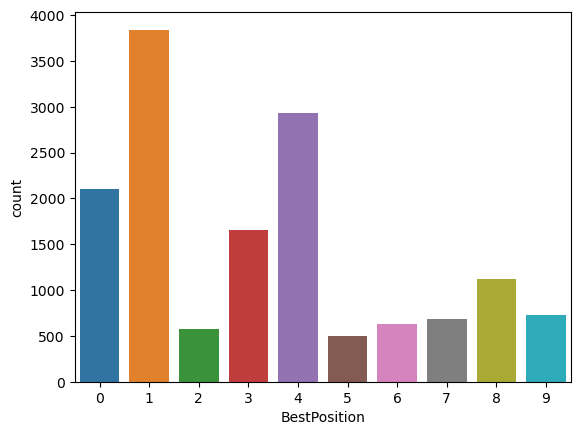

In [9]:
sns.countplot(x="BestPosition", data = Y_Train)

In [10]:
from imblearn.over_sampling import SMOTE 
from imblearn.over_sampling  import RandomOverSampler

oversample = RandomOverSampler(sampling_strategy='minority')
# fit and apply the transform
X_Train, Y_Train = oversample.fit_resample(X_Train, Y_Train)
X_Train, Y_Train = oversample.fit_resample(X_Train, Y_Train)
X_Train, Y_Train = oversample.fit_resample(X_Train, Y_Train)
X_Train, Y_Train = oversample.fit_resample(X_Train, Y_Train)

In [11]:
print(f' X_shape: {X_Train.shape} \n y_shape: {Y_Train.shape}')

 X_shape: (27732, 61) 
 y_shape: (27732, 1)


<Axes: xlabel='BestPosition', ylabel='count'>

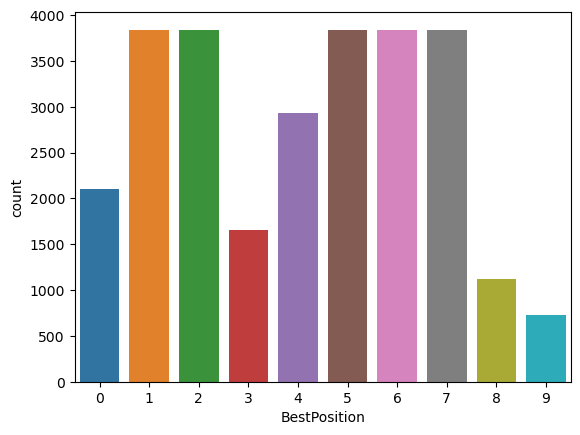

In [12]:
sns.countplot(x="BestPosition", data = Y_Train)

# 4. Feature Scaling:

In [13]:
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()

X_Train = mms.fit_transform(X_Train)
X_Test = mms.fit_transform(X_Test)

top = mms.fit_transform(top)

# Modeling

# Functions to be Used:

In [14]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score

# Function to check the classification report
def classification_report_fun(model_name, actual, predicted):
    print(f'The Classification Report for {model_name} Classifier:')
    print(classification_report(actual, predicted))
    
models_names = []
models_scores = []
models_auc_scores = []

In [15]:
def calculate_tpr_fpr(y_real, y_pred):
    '''
    Calculates the True Positive Rate (tpr) and the True Negative Rate (fpr) based on real and predicted observations
    
    Args:
        y_real: The list or series with the real classes
        y_pred: The list or series with the predicted classes
        
    Returns:
        tpr: The True Positive Rate of the classifier
        fpr: The False Positive Rate of the classifier
    '''
    
    # Calculates the confusion matrix and recover each element
    cm = confusion_matrix(y_real, y_pred)
    TN = cm[0, 0]
    FP = cm[0, 1]
    FN = cm[1, 0]
    TP = cm[1, 1]
    
    # Calculates tpr and fpr
    tpr =  TP/(TP + FN) # sensitivity - true positive rate
    fpr = 1 - TN/(TN+FP) # 1-specificity - false positive rate
    
    return tpr, fpr


In [16]:
def get_all_roc_coordinates(y_real, y_proba):
    '''
    Calculates all the ROC Curve coordinates (tpr and fpr) by considering each point as a treshold for the predicion of the class.
    
    Args:
        y_real: The list or series with the real classes.
        y_proba: The array with the probabilities for each class, obtained by using the `.predict_proba()` method.
        
    Returns:
        tpr_list: The list of TPRs representing each threshold.
        fpr_list: The list of FPRs representing each threshold.
    '''
    tpr_list = [0]
    fpr_list = [0]
    for i in range(len(y_proba)):
        threshold = y_proba[i]
        y_pred = y_proba >= threshold
        tpr, fpr = calculate_tpr_fpr(y_real, y_pred)
        tpr_list.append(tpr)
        fpr_list.append(fpr)
    return tpr_list, fpr_list


In [17]:
def plot_roc_curve(tpr, fpr, scatter = True, ax = None):
    '''
    Plots the ROC Curve by using the list of coordinates (tpr and fpr).
    
    Args:
        tpr: The list of TPRs representing each coordinate.
        fpr: The list of FPRs representing each coordinate.
        scatter: When True, the points used on the calculation will be plotted with the line (default = True).
    '''
    if ax == None:
        plt.figure(figsize = (5, 5))
        ax = plt.axes()
    
    if scatter:
        sns.scatterplot(x = fpr, y = tpr, ax = ax)
    sns.lineplot(x = fpr, y = tpr, ax = ax)
    sns.lineplot(x = [0, 1], y = [0, 1], color = 'green', ax = ax)
    plt.xlim(-0.05, 1.05)
    plt.ylim(-0.05, 1.05)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")


In [18]:
def draw_pco(Y_Proba, classes):
    # Plots the Probability Distributions and the ROC Curves One vs Rest
    plt.figure(figsize = (12, 8))
    bins = [i/20 for i in range(20)] + [1]
    roc_auc_ovr = {}
    
    for i in range(len(classes)):
        # Gets the class
        c = classes[i]

        # Prepares an auxiliar dataframe to help with the plots
        #df_aux = X_Test.copy()
        df_aux = pd.DataFrame()
        df_aux['class'] = [1 if list(mapping.keys())[list(mapping.values()).index(y)] == c else 0 for y in Y_Test.values]
        df_aux['prob'] = Y_Proba[:, i]
        df_aux = df_aux.reset_index(drop = True)

        # Plots the probability distribution for the class and the rest
        ax = plt.subplot(2, 3, i+1)
        sns.histplot(x = "prob", data = df_aux, hue = 'class', color = 'b', ax = ax, bins = bins)
        ax.set_title(c)
        ax.legend([f"Class: {c}", "Rest"])
        ax.set_xlabel(f"P(x = {c})")

        # Calculates the ROC Coordinates and plots the ROC Curves
        ax_bottom = plt.subplot(2, 3, i+4)
        tpr, fpr = get_all_roc_coordinates(df_aux['class'], df_aux['prob'])
        plot_roc_curve(tpr, fpr, scatter = False, ax = ax_bottom)
        ax_bottom.set_title("ROC Curve OvR")

        # Calculates the ROC AUC OvR
        roc_auc_ovr[c] = roc_auc_score(df_aux['class'], df_aux['prob'])

    plt.tight_layout()

In [19]:
positions = ['CF', 'CM', 'RW', 'GK', 'CB', 'LW', 'LM', 'LB','RM', 'RB']
positions


['CF', 'CM', 'RW', 'GK', 'CB', 'LW', 'LM', 'LB', 'RM', 'RB']

# 1. Logistic Regression:

In [20]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [21]:
lr.fit(X_Train , Y_Train)


LogisticRegression()

In [22]:
lr.score(X_Train , Y_Train)


0.6981465455069955

In [23]:
lr.score(X_Test, Y_Test)

0.7517615176151762

In [24]:
Y_Pred_lr = lr.predict(X_Test)

In [25]:
models_names.append("Logistic Regression")
models_scores.append(lr.score(X_Test, Y_Test))

In [26]:
classification_report_fun("Logistic Regression", Y_Test, Y_Pred_lr)

The Classification Report for Logistic Regression Classifier:
              precision    recall  f1-score   support

           0       0.93      0.88      0.90       522
           1       0.92      0.74      0.82       962
           2       0.23      0.68      0.34       132
           3       1.00      1.00      1.00       391
           4       0.88      0.95      0.92       711
           5       0.34      0.24      0.28       116
           6       0.34      0.65      0.45       168
           7       0.63      0.82      0.71       178
           8       0.70      0.35      0.47       313
           9       0.74      0.26      0.39       197

    accuracy                           0.75      3690
   macro avg       0.67      0.66      0.63      3690
weighted avg       0.81      0.75      0.76      3690



In [27]:
Y_Proba_lr = lr.predict_proba(X_Test)


In [28]:
draw_pco(Y_Proba_lr, ['CF', 'CM', 'RW'])
draw_pco(Y_Proba_lr, ['GK', 'CB', 'LW'])
draw_pco(Y_Proba_lr, ['LM', 'LB','RM'])
draw_pco(Y_Proba_lr, ['RB'])

NameError: name 'mapping' is not defined

<Figure size 1200x800 with 0 Axes>